<a href="https://colab.research.google.com/github/prprakash02/Fractal_Code/blob/main/Cool_Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Burning Ship Fractal

In [7]:
#Imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Pre-req functions

In [8]:
def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a
def processFractal1(a):
  a = np.uint8(np.clip(a, 0, 255))
  return a

## Burning Ship fractal:
The Burning Ship fractal, first described and created by Michael Michelitsch and Otto E. Rössler in 1992, is generated by iterating the function:
image.png

in the complex plane C  which will either escape or remain bounded

## Classic:

<ipython-input-8-e6c38dd74ab6>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


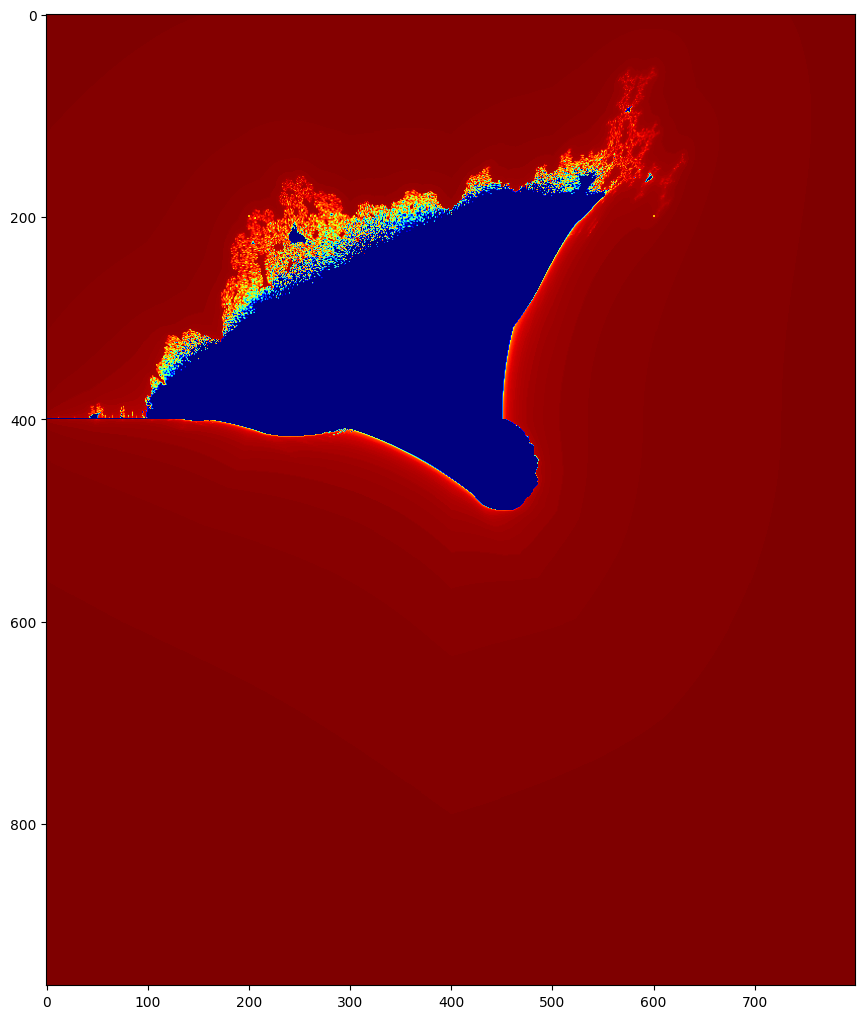

In [9]:
Y, X = np.mgrid[-2:2.8:0.005, -2:2:0.005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y)
zs = z.clone()
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

for i in range(200):
  #Compute the new values of z: |z|^2 + z
  k = torch.complex(torch.abs(zs.real),torch.abs(zs.imag)) # abs() only calculates absolute values and complex() merges it
  # Parallelism is attained when the whole of k a tensor is squared and also when calculating the absolute value above.
  ### But isn't in general data parallelism refers to distributing the data between different processing unit?
  zs_ = k*k + z
  not_diverged = torch.abs(zs_) < 20.0
  ns += not_diverged.type(torch.FloatTensor)
  zs = zs_

fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal1(ns.numpy()), cmap ='jet_r')
plt.tight_layout(pad=0)
plt.show()

### When we zoom In:

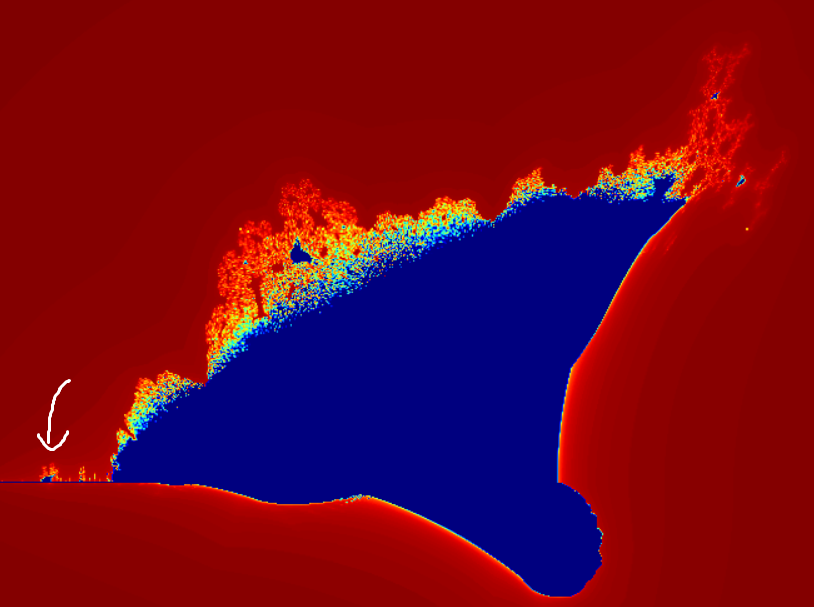

<ipython-input-8-e6c38dd74ab6>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


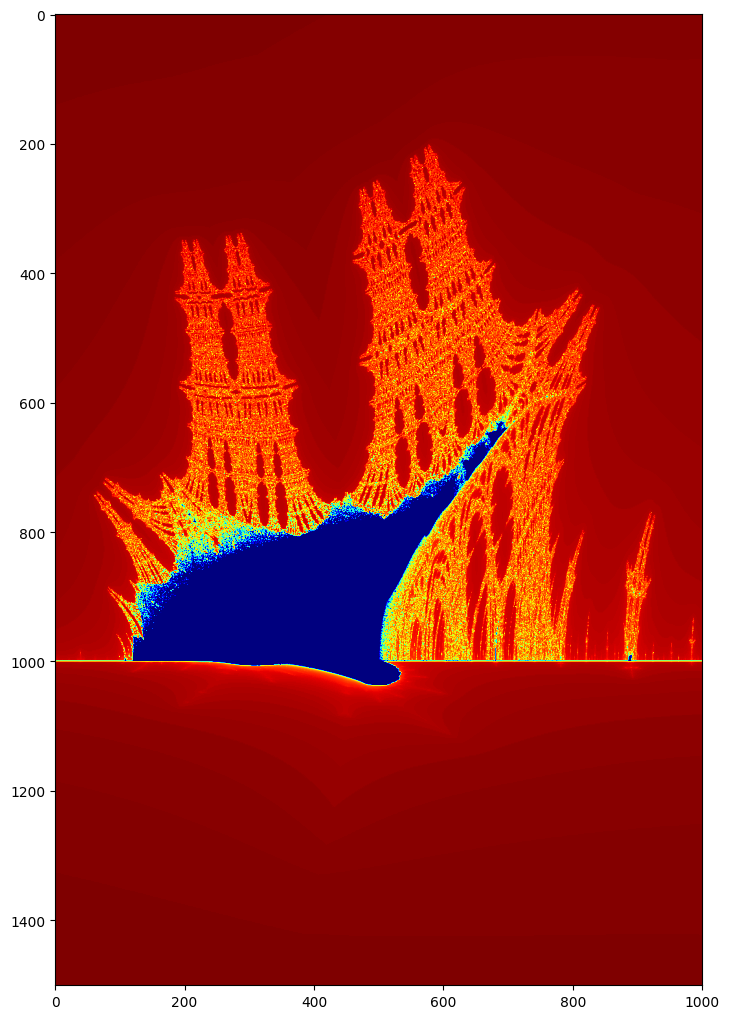

In [10]:
Y, X = np.mgrid[-0.1:0.05:0.0001, -1.8:-1.7:0.0001]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone()
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

for i in range(200):
  #Compute the new values of z: k*k + z
  k = torch.complex(torch.abs(zs.real),torch.abs(zs.imag))
  zs_ = k*k + z
  not_diverged = torch.abs(zs_) < 20.0
  ns += not_diverged.type(torch.FloatTensor)
  zs = zs_

fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal1(ns.numpy()), cmap ='jet_r')
plt.tight_layout(pad=0)
plt.show()

<u>The above are traditional and well known: https://en.wikipedia.org/wiki/Burning_Ship_fractal

# New Fractal:

<ipython-input-8-e6c38dd74ab6>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


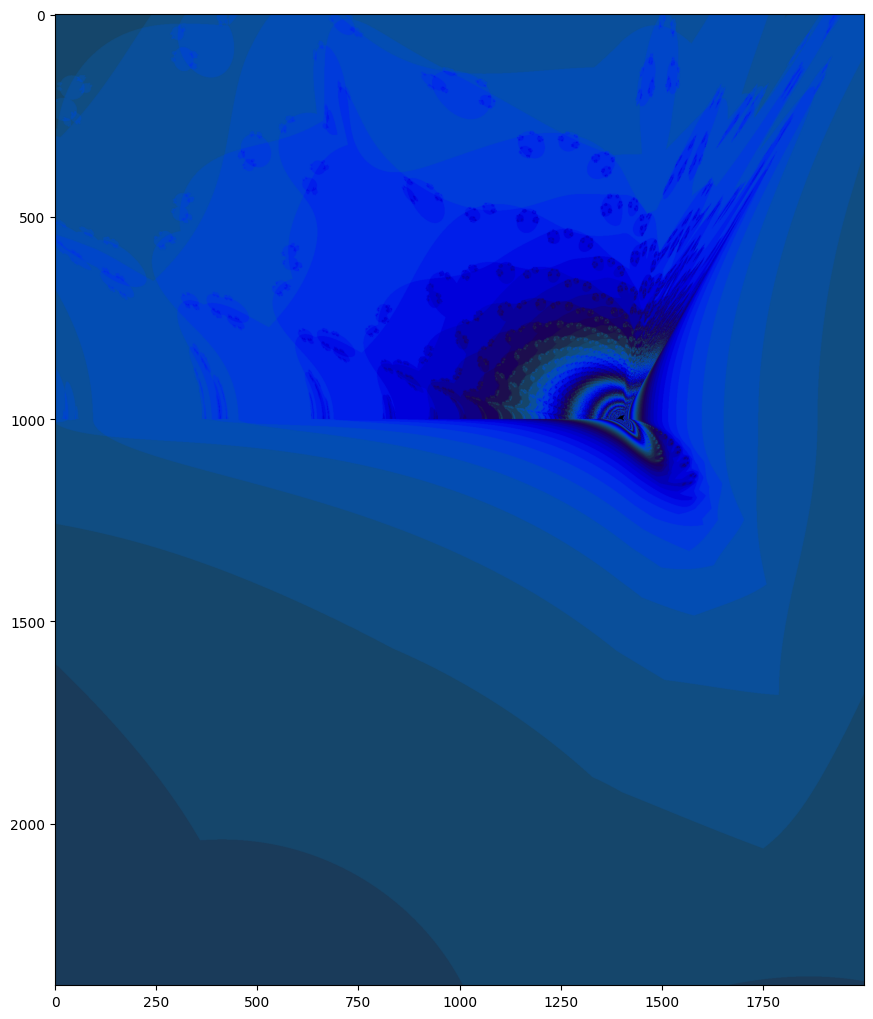

In [11]:
Y, X = np.mgrid[-0.5:0.7:0.0005, -0.7:0.3:0.0005]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone()
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

p=0
for i in range(300):
  #Compute the new values of z: k*k + p*z
  k = torch.complex(torch.abs(zs.real),torch.abs(zs.imag))
  zs_ = k*k + p*z
  not_diverged = torch.abs(zs_) < 2
  ns += not_diverged.type(torch.FloatTensor)
  zs = zs_
  p+=1

fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns.numpy()), cmap ='Oranges_r')
plt.tight_layout(pad=0)
plt.show()

## Zoomed In version

<ipython-input-8-e6c38dd74ab6>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


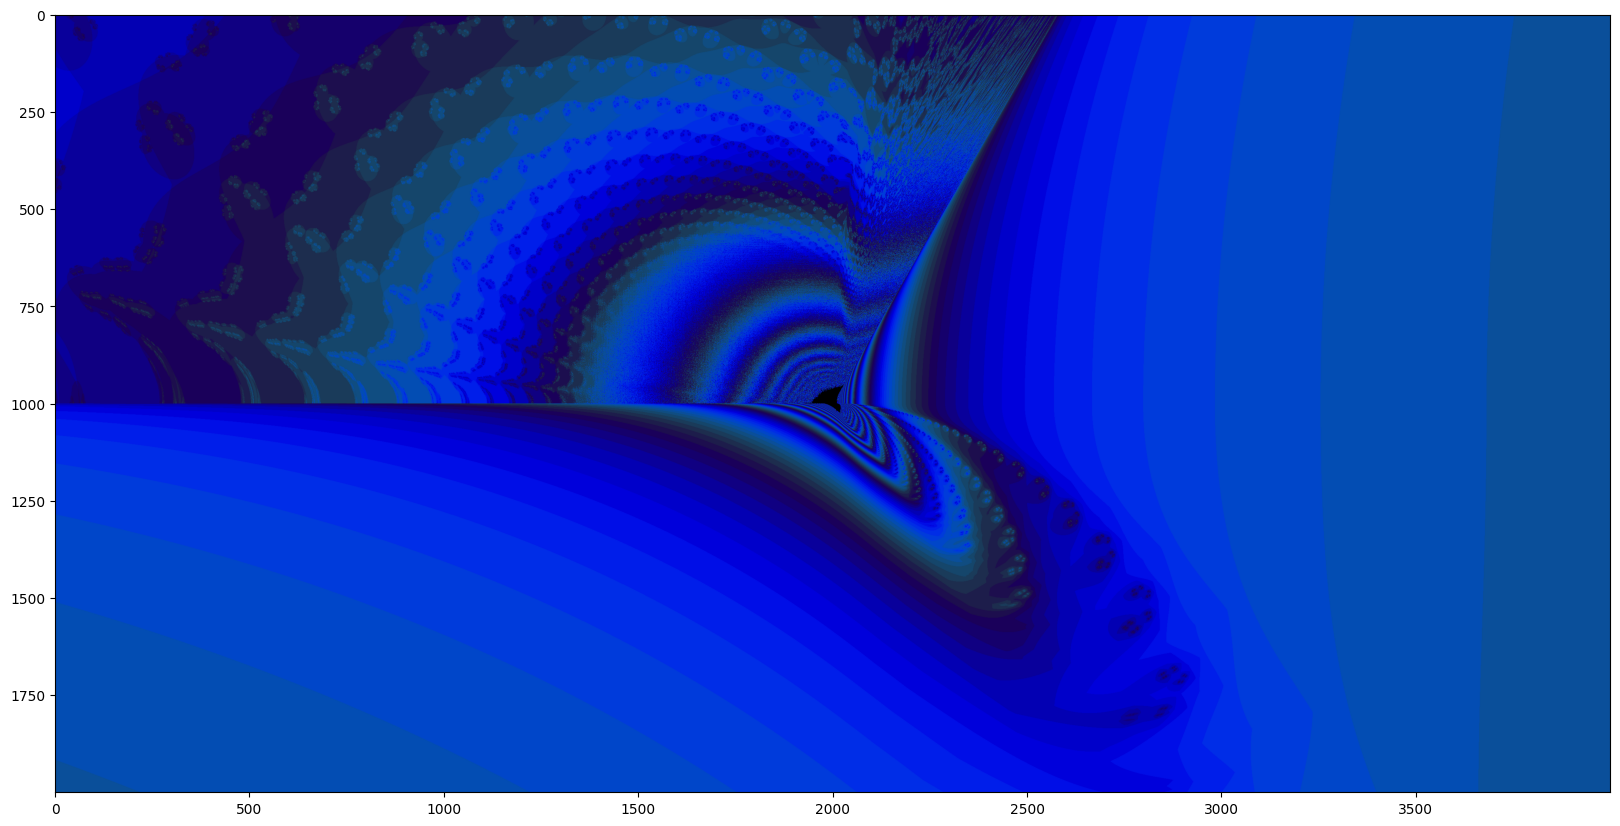

In [12]:
Y, X = np.mgrid[-0.1:0.1:0.0001, -0.2:0.2:0.0001]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone()
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

p=0
for i in range(300):
  #Compute the new values of z: z^2 + x
  k = torch.complex(torch.abs(zs.real),torch.abs(zs.imag))
  zs_ = k*k + p*z
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 2
  ns += not_diverged.type(torch.FloatTensor)
  zs = zs_
  p+=1

fig = plt.figure(figsize=(16,10))
plt.imshow(processFractal(ns.numpy()), cmap ='jet_r')
plt.tight_layout(pad=0)
plt.show()

# <b>The Interesting thing is none of the classic burning ship fractal have a filled void which are self similar, instead they all have a hollow void;
# <b>The one's where we have a {p} included in the algorithm tend to show a different fractal<b>

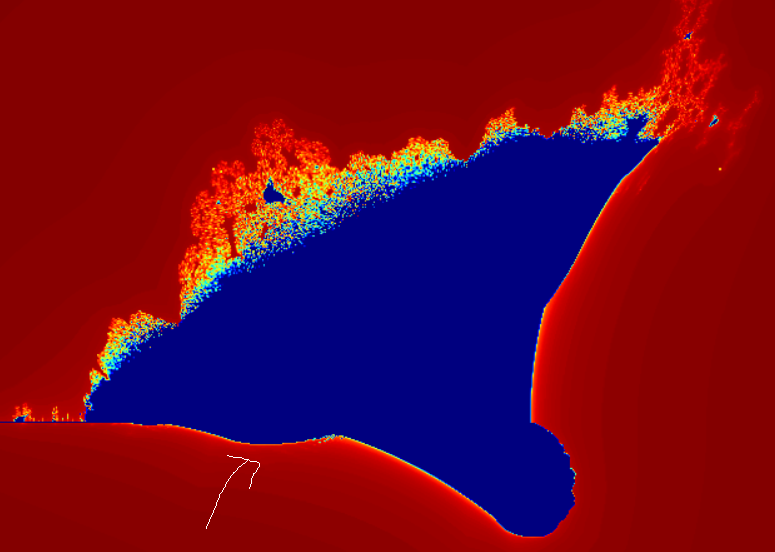

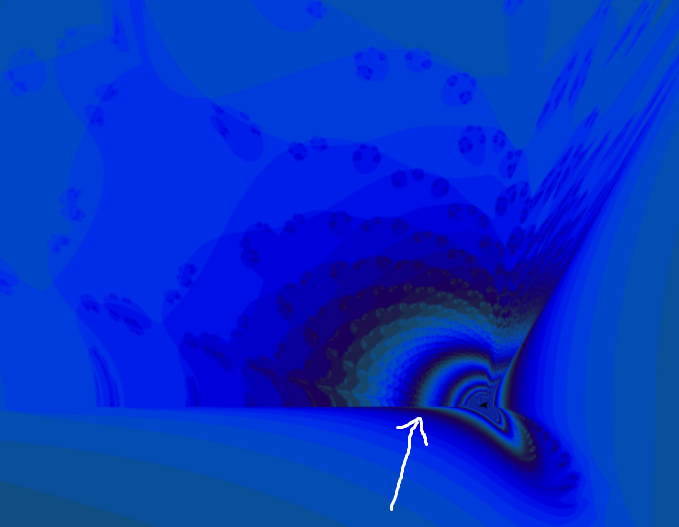